In [1]:
from builder import Builder, Process

In [2]:
b = Builder()

In [3]:
b.list_processes()

['ram-emitter', 'console-emitter']


In [4]:
from process_bigraph.experiments.minimal_gillespie import GillespieEvent , GillespieInterval
b.register_process('GillespieEvent', GillespieEvent)
b.register_process('GillespieInterval', GillespieInterval)

In [5]:
b.list_processes()

['GillespieInterval', 'ram-emitter', 'console-emitter', 'GillespieEvent']


In [6]:
## add processes
b['event_process'].add_process(
    name='GillespieEvent',
    kdeg=1.0,  # kwargs fill parameters in the config
)

In [7]:
# b.compile()

In [8]:
b['event_process'].ports(True)

{
'_inputs': {},
'_outputs': {}
}


In [9]:
# b.schema

In [10]:
b['event_process'].schema

{}

In [11]:
b['event_process'].connect(port='mRNA', target=['mRNA_store'])
b

{
'event_process': {
   '_type': 'process',
   'address': 'local:GillespieEvent',
   'config': {
      'kdeg': 1.0,
      'ktsc': 5.0
  },
   'inputs': {
      'mRNA': ['mRNA_store']
  },
   'outputs': {
      'mRNA': ['mRNA_store']
  },
   'instance': <process_bigraph.experiments.minimal_gillespie.GillespieEvent object at 0x109ddd910>,
   'interval': 1.0
}
}

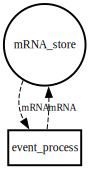

In [12]:
b.visualize()

In [13]:
# from builder.builder_api import Builder, dict_from_builder_tree
# tree_dict = dict_from_builder_tree(b.tree)

# tree_dict

In [14]:
@b.register_process('toy')
class Toy(Process):
    config_schema = {
        'A': 'float',
        'B': 'float',
    }

    def __init__(self, config, core):
        super().__init__(config, core)

    def schema(self):
        return {
            'inputs': {
                'A': 'float',
                'B': 'float'},
            'outputs': {
                'C': 'float'}
        }

    def update(self, state, interval):
        update = {
            'C': state['A'] + state['B']
        }
        return update


In [15]:
b.list_processes()

['toy', 'console-emitter', 'GillespieEvent', 'ram-emitter', 'GillespieInterval']


In [16]:
b['toy'].add_process(name='toy')

In [17]:
b['toy'].ports()

{'_inputs': {}, '_outputs': {}}

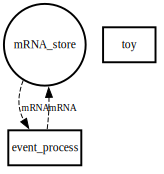

In [18]:
b.visualize()

In [19]:
b['toy'].connect(port='A', target='A_store')
# b['toy'].connect(port='B', target='B_store')  # TODO -- compile is trying to connect A at the wrong level??
# b['toy'].connect(port='C', target='C_store')

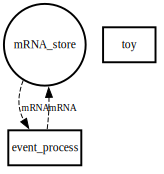

In [21]:
b.visualize()

In [ ]:
b.document()

In [ ]:
b.write(filename='toy_bigraph')